<a href="https://colab.research.google.com/github/RobBurnap/Bioinformatics-MICR4203-MICR5203/blob/main/notebooks/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-means Clustering Example;**

based on example from Alex Burnap, Yale University
In this example, we will use k-means to find centers of clusters within our data. Our dataset will be generated synthetically using 2 dimensions and 3 clusters. We will then pretend not to know the number of clusters, and use the k-means algorithm to iterate over 1,2,3,...10 different clusters. By plotting out the "clustering error," we will be able to estimate that the number of clusters is indeed 3. In addition,


In [1]:
%pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.1 MB/s eta 0:00:00


In [2]:
# First lets import the libraries we will need
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,4)  # default size

In [3]:
%matplotlib inline

## First let's generate some synthetic data
#### We use the convention that all data is contained in a $NxM$ data matrix denoted $\textbf{X}$, in other words $N$ datapoints where each $\textbf{x}\in\textrm{R}^{M}$


In [4]:
cluster1_mean, cluster2_mean, cluster3_mean = np.array([-1,1]), np.array([1,1]), np.array([1,-1])

In [5]:
print (cluster1_mean)
print (cluster2_mean)
print (cluster3_mean)

[-1  1]
[1 1]
[ 1 -1]


#### Now that we have defined our 3 cluster centers in two dimensions $M=2$, we will create 25 randomly distributed data points per cluster for a total of 75 total data points $N=75$.  We will assume these randomly distributed datapoints are Gaussian distributed with $\mu=0$ and $\sigma^{2}= 0.1$

In [6]:
# Note that we need to convert a "standard Gaussian" to our scaled Gaussian by multiplying by sigma and adding mu
cluster1_X = cluster1_mean + np.random.randn(25,2) * np.sqrt(0.01)
cluster2_X = cluster2_mean + np.random.randn(25,2) *np.sqrt(0.01)
cluster3_X = cluster3_mean + np.random.randn(25,2) * np.sqrt(0.01)

In [7]:
print (cluster1_X), print (cluster2_X), print (cluster3_X)

[[-0.90183902  0.77150254]
 [-1.05638936  0.99452085]
 [-1.13342468  0.98408424]
 [-1.12586591  1.06910615]
 [-0.97217515  0.91633707]
 [-1.0240342   0.93733101]
 [-0.9056951   1.27193151]
 [-0.89054732  1.03218792]
 [-0.77046886  1.0020498 ]
 [-1.03810089  0.90197079]
 [-0.86105488  1.00022928]
 [-1.07189714  1.06831873]
 [-0.91148942  1.03889708]
 [-1.17191836  1.1716252 ]
 [-0.93918192  1.06871029]
 [-1.11614962  0.98459633]
 [-1.05346887  0.93915804]
 [-0.8995241   1.00826324]
 [-1.18760468  0.95462389]
 [-1.14774278  0.97426509]
 [-1.08187405  1.11568516]
 [-1.19006741  1.04113754]
 [-1.1883367   1.03934241]
 [-1.03544784  1.02739544]
 [-1.30092451  0.83262238]]
[[1.48061101 0.68961797]
 [1.17080669 1.40609472]
 [1.22673691 1.05149201]
 [0.97675422 1.16039196]
 [0.8143438  0.78419697]
 [0.61543259 1.11208112]
 [1.07065819 1.15362042]
 [1.16411645 1.59936475]
 [1.36418802 1.13269306]
 [1.03168976 1.36814002]
 [1.31002549 0.92040496]
 [1.22956378 0.8040147 ]
 [0.98795268 1.1095031 ]

(None, None, None)

#### Now let's concatenate our 3 datasets to our full dataset denoted $\textbf{X}$

In [8]:
X = np.concatenate( (cluster1_X, cluster2_X, cluster3_X), axis=0)

In [9]:
np.random.shuffle(X)

In [10]:
print (cluster1_X)

[[-0.90183902  0.77150254]
 [-1.05638936  0.99452085]
 [-1.13342468  0.98408424]
 [-1.12586591  1.06910615]
 [-0.97217515  0.91633707]
 [-1.0240342   0.93733101]
 [-0.9056951   1.27193151]
 [-0.89054732  1.03218792]
 [-0.77046886  1.0020498 ]
 [-1.03810089  0.90197079]
 [-0.86105488  1.00022928]
 [-1.07189714  1.06831873]
 [-0.91148942  1.03889708]
 [-1.17191836  1.1716252 ]
 [-0.93918192  1.06871029]
 [-1.11614962  0.98459633]
 [-1.05346887  0.93915804]
 [-0.8995241   1.00826324]
 [-1.18760468  0.95462389]
 [-1.14774278  0.97426509]
 [-1.08187405  1.11568516]
 [-1.19006741  1.04113754]
 [-1.1883367   1.03934241]
 [-1.03544784  1.02739544]
 [-1.30092451  0.83262238]]


## Now let's plot our data to see what it looks like

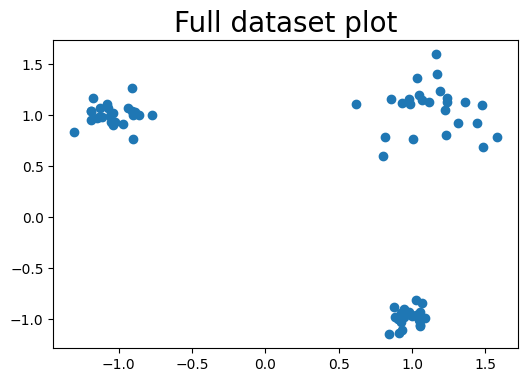

In [11]:
plt.scatter(X[:,0], X[:,1])
plt.title("Full dataset plot", fontsize=20)
plt.show()

## Let's cluster this data

#### This dataset is 2 dimensional $M=2$ and has 75 datapoints $N=75$; while we know that there are 3 clusters since we made the data, in a real problem we will not know the number of clusters and just know $N$ and $M$.  By convention, we often denote the number of clusters as $k$

In [12]:
# This is the k-means clustering function we are interested in
from Bio.Cluster import kcluster

In [13]:
#Let's check out the arguments and output of this function
kcluster?

In [14]:
kcluster(data=X,nclusters=4)

(array([2, 2, 0, 3, 0, 2, 0, 3, 1, 0, 2, 2, 3, 3, 0, 0, 1, 0, 0, 0, 1, 3,
        3, 2, 3, 0, 2, 3, 0, 3, 2, 1, 3, 3, 0, 3, 3, 3, 0, 2, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 2, 3, 2, 3, 3, 3, 1, 3, 0, 2, 2, 0, 1, 3, 3, 3, 3,
        0, 0, 0, 0, 3, 2, 2, 2, 3], dtype=int32),
 1.6519304516821989,
 1)

#### As we can see from the docstring, the kcluster function has a number of arguments:
kcluster(data, nclusters=2, mask=None, weight=None,
         transpose=0, npass=1, method='a', dist='e',
         initialid=None) -> clusterid, error, nfound
#### We will be most interested in the number of clusters $\textrm{nclusters}$ and the distance function $\textrm{dist}$.

#### In general, clustering algorithms (and most machine learning algorithms) use a "distance metric" between all the datums in a dataset to obtain some notion of similarity between datapoints.  Using this notion of similarity, one can: (1) cluster similar points (i.e., unsupervised learning, in which we have no discrete or continuous classes); (2) classify similar points into different class labels (i.e., the discrete case); or (3) perform regression (i.e., the continous case).

#### This distance metric is often a polynomial-based norm, such as the L0, L1, or L2 distance; or another distance metric such as the Pearson correlation coefficient or Kendall's Tau.  Each distance metric is used for different underlying assumptions on the data (and thus the underlying biology) of you problem.  Moreover, this can get confusing because many of these norms have equivalent names:
#### L1 Norm = Manhattan distance, city-block distance, absolute deviation
#### L2 Norm = Euclidean distance, Squared-error distance, Tikhonov distance, Vector norm difference

In [15]:
# Note that this will be default look for 2 clusters using the Euclidean distance
kcluster(X)

(array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int32),
 31.355421372231305,
 1)

In [16]:
# This will use the default Euclidean distance but now we specify the number of clusters
kcluster(X, nclusters=3)

(array([0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 0, 1,
        1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0,
        0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1,
        2, 2, 2, 2, 1, 0, 0, 0, 1], dtype=int32),
 1.7987176603964041,
 1)

In [17]:
kcluster(X, nclusters=4)

(array([3, 3, 0, 2, 0, 3, 1, 2, 3, 0, 3, 3, 2, 2, 0, 0, 3, 1, 1, 0, 3, 2,
        2, 3, 2, 0, 3, 2, 0, 2, 3, 3, 2, 2, 1, 2, 2, 2, 1, 3, 0, 0, 0, 3,
        3, 0, 3, 0, 0, 3, 2, 3, 2, 2, 2, 3, 2, 0, 3, 3, 0, 3, 2, 2, 2, 2,
        0, 0, 1, 1, 2, 3, 3, 3, 2], dtype=int32),
 1.3043940498106552,
 1)

#### We can see that the "error" of the L2 distance is an output of the function, in fact, let's plot it out as a function of number of clusters

In [18]:
clustering_error = np.zeros(10)
for i in range(10):
    # Note that we take the "1st" element from the returned tuple, which is the "error"
    # Also note that nclusters = i+1 since this needs to be >= 1
    clustering_error[i] = kcluster(X, nclusters=i+1)[1]

In [19]:
clustering_error

array([72.41056781, 28.14589327, 31.29972457,  1.29302978,  0.96065874,
        0.78799538,  1.06607089,  0.63385411,  0.69202079,  0.64613918])

Text(0.5, 1.0, 'Clustering Error versus Number of Clusters')

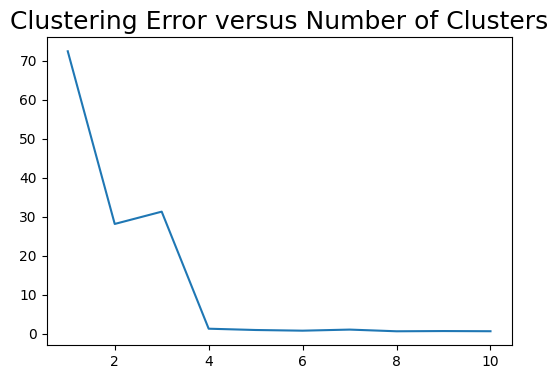

In [20]:
plt.plot(np.arange(10)+1, clustering_error)
plt.title("Clustering Error versus Number of Clusters", fontsize=18)

### As we can see, the clusering error "shoulders" at 3 clusters, suggesting this is the number of clusters we should be expecting -- in other words, in the limit that we have $N$ clusters, each data point has its own cluster so we

### As we can see, the clusering error "shoulders" at 3 clusters, suggesting this is the number of clusters we should be expecting -- in other words, in the limit that we have $N$ clusters, each data point has its own cluster so we

##Now let's use k-means clustering to "find" the 3 clusters and color the data points by what we estimate for each datum's cluster membership

# Note that we will be taking the first output of this function, which is the "estimated" classes of the estimated clusters
estimated_cluster_labels = kcluster(X, nclusters=3)[0]
# Also note that we had to put [0] on the end since kcluster returns a tuple of the cluster labels and the estimation error

In [26]:
#Note that we will be taking the first output of this function, which is the "estimated" classes of the estimated clusters
estimated_cluster_labels = kcluster(X, nclusters=3)[0]
estimated_cluster_labels

array([0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 0, 1,
       1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 0, 0, 0, 1], dtype=int32)

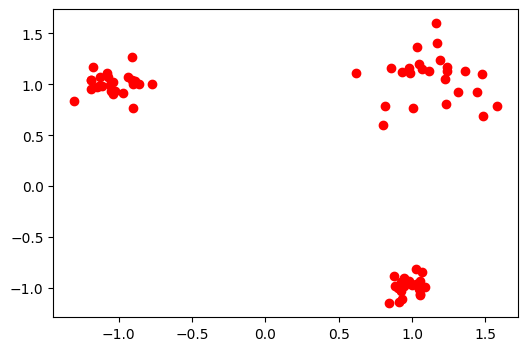

In [27]:
plt.scatter(X[:,0], X[:,1], c='red')

#We want to manually select the datapoints from the X matrix corresponding to the estimated cluster labels. To do this, we use a "boolean" mask array. It is an array made up of boolean True/False elements that allows us to pick out the elements from the full data matrix we are interested in¶

In [28]:
# Here is an example cluster labels for the "first" cluster
estimated_cluster_labels==0

array([ True,  True, False, False, False,  True, False, False,  True,
       False,  True,  True, False, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False,  True, False, False,  True, False,  True, False, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False])

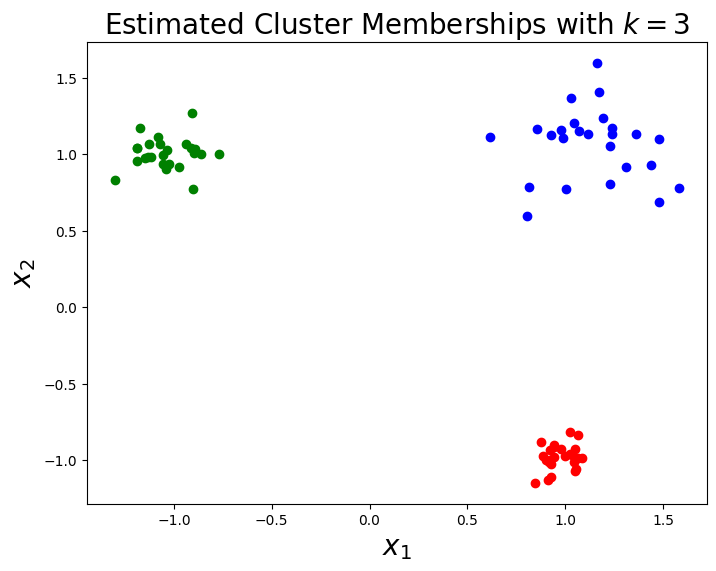

In [29]:
# We do not need to manually set the "figure" canvas, but we do if we want a custom figure size
plt.figure(figsize=(8,6))
plt.title("Estimated Cluster Memberships with $k=3$", fontsize=20)
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)

# Let's iterate over the number of clusters (3 from the plot above)
for i in range(3):
    # Here is our color if-else statements
    if i == 1:
        color = 'r'
    elif i == 2:
        color = 'b'
    else:
        color = 'g'
    plt.scatter(X[estimated_cluster_labels==i, 0], X[estimated_cluster_labels==i, 1], c=color)
